# Extinction: A Primer

## Kristen Larson
### Western Washington University

We start by defining spectral extinction as
$$
A_\lambda = +2.5\log\left( \frac{F_{\lambda 0}}{F_\lambda} \right)
$$

So, the extinction function can be interpreted as extinguished flux by
$$
F_\lambda = F_{\lambda 0} 10^{-0.4A_\lambda}.
$$



Many of us think about extinction in terms of magnitudes,
$$
\Delta m = -2.5\log\left(\int W_\lambda F_\lambda d\lambda\right) + 2.5\log\left(\int W_\lambda F_{\lambda 0} d\lambda \right)
$$
where $W$ is the filter transmission curve.

If $F_{\lambda 0}$ is the zero-point flux, then $\Delta m$ is the magnitude.  If, on the other hand, $F_{\lambda 0}$ is the flux before the dust, then $\Delta m$ is the magnitude extinction in the band, 
$$
A = -2.5\log\left(\int W_\lambda F_{\lambda 0} 10^{-0.4A_\lambda} d\lambda\right) + 2.5\log\left(\int W_\lambda F_{\lambda 0} d\lambda \right)
$$

$$
= -2.5\log\left(\frac{\int W_\lambda F_{\lambda 0} 10^{-0.4A_\lambda} d\lambda}{\int W_\lambda F_{\lambda 0} d\lambda} \right).
$$




The point here is that it is impossible to correctly calculate the magnitude extinction without the orginal flux.  If and only if the filter efficiency is constant in the band (i.e. $W_\lambda = W$) and the flux is constant in the band (i.e. $F_\lambda = F$) can we cancel these factors and convert a "theory extinction curve" into magnitudes.

As a shorthand, it might be useful to remember that the band extinction $A$ is roughly equal to the average of $A_\lambda$ in the band.  In general, however, the band response and the source flux must be taken into consideration.  Many extinction curves have been determined to match photometry, not the other way around.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Exercise 0

For these first few examples, we will ignore the dependence on the background source flux.  

Let's consider, for a first example, the extinction curve from Tables 3 and 4 in Fitzpatrick (1999) and the updated version in the FMunred IDL procedure.  

For those who have used dereddening routines before, please note that both FMunred and Fitzpatrick (1999) return A/E(B-V), so **always divide the output by R(V)=A(V)/E(B-V) to get A$_\lambda$/A(V)**.

In [4]:
run utils/getFMext.py

In [5]:
x=np.arange(0.5,5,.01)

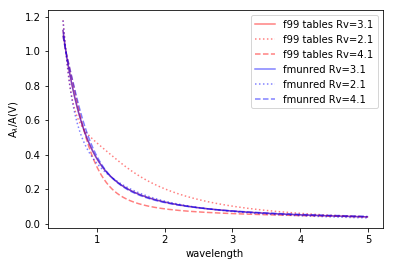

In [6]:
for model,color in [['f99 tables','r'],['fmunred','b']]:
    for Rv,line in [[3.1,'solid'],[2.1,'dotted'],[4.1,'dashed']]:
        plt.plot(x,getFMext(x,Rv,model)/Rv,color,label=model+' Rv='+str(Rv),linestyle=line,alpha=0.5)
plt.xlabel('wavelength')
plt.ylabel('A$_\lambda$/A(V)')
plt.legend(loc='best')
plt.show()

Or, if inverse wavelength is your thing... One benefit to plotting it this way is that that we require the extinction to go to zero at infinitely large wavelength in the absense of "grey" extinction, so plotted versus inverse wavelength, we can check the intercept.

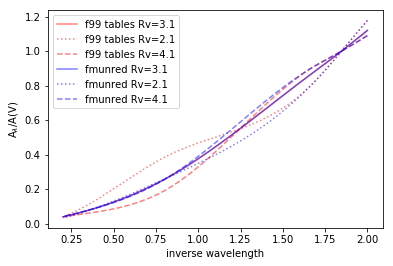

In [7]:
for model,color in [['f99 tables','r'],['fmunred','b']]:
    for Rv,line in [[3.1,'solid'],[2.1,'dotted'],[4.1,'dashed']]:
        plt.plot(1.0/x,getFMext(x,Rv,model)/Rv,color,label=model+' Rv='+str(Rv),linestyle=line,alpha=0.5)
plt.xlabel('inverse wavelength')
plt.ylabel('A$_\lambda$/A(V)')
plt.legend(loc='best')
plt.show()

Now that we have a few extinction curves, let's calculate photometric extinction.  Again, for this first pass, I will ignore the background flux dependence.

In [8]:
run utils/getMags_ext.py

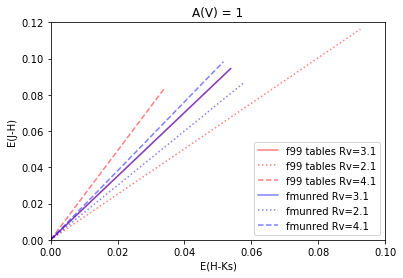

In [9]:
for model,color in [['f99 tables','r'],['fmunred','b']]:
    for Rv,line in [[3.1,'solid'],[2.1,'dotted'],[4.1,'dashed']]:
        m=getMags_ext(x,getFMext(x,Rv,model)/Rv)
        plt.plot([0,m['H']-m['Ks']],[0,m['J']-m['H']],color,linestyle=line,label=model+' Rv='+str(Rv),alpha=0.5)
plt.xlabel('E(H-Ks)')
plt.ylabel('E(J-H)')
plt.title('A(V) = 1')
plt.xlim([0,0.1])
plt.ylim([0,0.12])
plt.legend(loc='best')
plt.show()

The curve implied by the tables in Fitzpatrick (1999) has much more variation in the infrared than what is currently used in FMunred.  Not only is the slope E(J-H)/E(H-K) more variable, but the amount of reddening is also significantly variable.

So, we suspect a problem somewhere, and we find it by the usual method: carefully reading the paper again!  While the tables in the paper might imply non-variable spline anchors in the infrared, the text says to multiply the anchors by $R_V/3.1$.

Let's investigate what this means.  Since the routine returns $A_\lambda/E(B-V)$, dividing by 3.1 converts the output to $A_\lambda/A_V$ for the $R_V=3.1$ curve.  Multiplying by the new $R_V$ converts it back to  $A_\lambda/E(B-V)$.

Let's check with that correction to see if the two methods now agree:

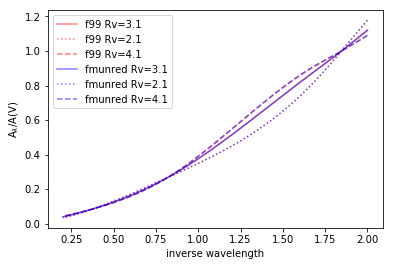

In [10]:
for model,color in [['f99','r'],['fmunred','b']]:
    for Rv,line in [[3.1,'solid'],[2.1,'dotted'],[4.1,'dashed']]:
        plt.plot(1.0/x,getFMext(x,Rv,model)/Rv,color,label=model+' Rv='+str(Rv),linestyle=line,alpha=0.5)
plt.xlabel('inverse wavelength')
plt.ylabel('A$_\lambda$/A(V)')
plt.legend(loc='best')
plt.show()

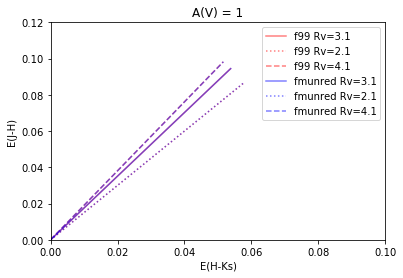

In [11]:
for model,color in [['f99','r'],['fmunred','b']]:
    for Rv,line in [[3.1,'solid'],[2.1,'dotted'],[4.1,'dashed']]:
        m=getMags_ext(x,getFMext(x,Rv,model)/Rv)
        plt.plot([0,m['H']-m['Ks']],[0,m['J']-m['H']],color,linestyle=line,label=model+' Rv='+str(Rv),alpha=0.5)
plt.xlabel('E(H-Ks)')
plt.ylabel('E(J-H)')
plt.title('A(V) = 1')
plt.xlim([0,0.1])
plt.ylim([0,0.12])
plt.legend(loc='best')
plt.show()

Yes, they now agree.  One interesting thing to note is that the near-infrared was required to be independent of $R_V$.  Small variation is caused because the curve is a spline.  In 1999, there wasn't much evidence of this uniformity, just a few handful of sightlines.  So is the NIR curve really that uniform?  Stay tuned!

### Exercise 1